In [1]:
# default_exp core

In [2]:
%load_ext autoreload
%autoreload 2

# Test nbdev, papermill, mlflow, yellowbricks
> oh f...

In [3]:
#hide
from nbdev.showdoc import *
from nbdev.export import notebook2script
from nbdev.sync import script2notebook

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = [20,8]

## Get data

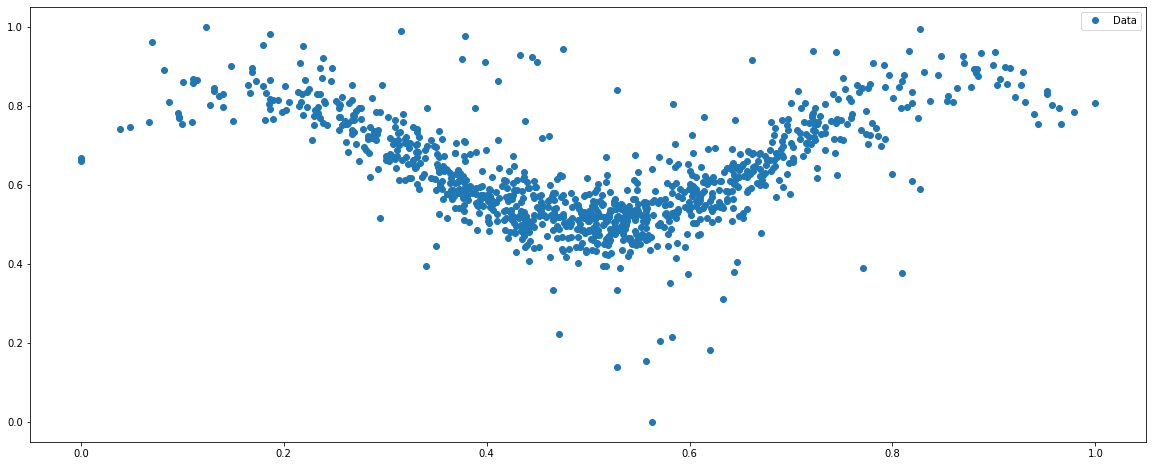

In [5]:
#export
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


def get_data(n_samples = 1000, n_outliers = 100):
    ''' Generate nonlinear data with outliers.
        Don't hesitate to change the generation parameters, method and data itself! Observe, how it changes results
    '''
    X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                          n_informative=1, noise=25,
                                          coef=False, random_state=1110)



    # Replace first N samples with outliers

    X[:n_outliers] = np.random.normal(size=(n_outliers, 1))
    y[:n_outliers] = 100 * np.random.normal(size=n_outliers)

    # Add non-linearity to data

    y = y+100*X.T[0]*np.sin(X.T[0])

    # Scale data to put in range [0,1] for stability.
    # Check results if ignore it.
    # See also sklearn User Guide (https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) and try another tools (Standartization, Normalization)
    X = (X - X.min())/(X.max()-X.min())
    y = (y - y.min())/(y.max()-y.min())
    return X,y

X,y = get_data()
assert len(X)==len(y)
plt.plot(X, y, 'o', label = 'Data')
plt.legend()

In [6]:
show_doc(get_data)

<h4 id="get_data" class="doc_header"><code>get_data</code><a href="__main__.py#L7" class="source_link" style="float:right">[source]</a></h4>

> <code>get_data</code>(**`n_samples`**=*`1000`*, **`n_outliers`**=*`100`*)

Generate nonlinear data with outliers.
Don't hesitate to change the generation parameters, method and data itself! Observe, how it changes results

In [17]:
#export

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import mlflow
import mlflow.sklearn

def make_experiment(X, y, n = 5):
    experiment = 'polynomial regression'
    mlflow.set_experiment(experiment)
    with mlflow.start_run() as run:
        mlflow.log_param("degree", n)
        run_id = run.info.run_id
        print(run.info)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

        polynomial_features = PolynomialFeatures(degree = n) # create instance of transformer
        regression = LinearRegression() # create instance of model

        # make pipeline as list of pairs (<stage name>, <stage object>):
        pipeline = Pipeline([("polynomial_features", polynomial_features), # augment data
                           ("linear_regression", regression)]) # apply linear regression

        # from now we can treat pipeline as a single model, applying all stages when using fit() and predict() 
        pipeline.fit(X_train, y_train)
        score = pipeline.score(X_test, y_test)
        train_score = pipeline.score(X_train, y_train)
        print("Score: %s" % score)
        mlflow.log_metrics({"score": score,"train_score": train_score})
        mlflow.sklearn.log_model(pipeline, "model")
        print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
        return pipeline
model = make_experiment(X,y)
#assert len(model.predict(X))==len(y)

MlflowException: Cannot set a deleted experiment 'polynomial regression' as the active experiment. You can restore the experiment, or permanently delete the  experiment to create a new one.

In [8]:
from  mlflow.tracking import MlflowClient
client = MlflowClient()
experiments = client.list_experiments()

In [9]:
experiments

[]

In [16]:
clinet.

MlflowException: Could not find experiment with ID 1

In [ ]:
mlflow.end_run()

In [ ]:
show_doc(make_experiment)

In [ ]:
if __name__ == "__main__":
    X,y = get_data()
    for i in range(10):
        for n in range(2,10):
            pipeline = make_experiment(X,y,n)

In [ ]:
from yellowbrick.regressor import prediction_error, residuals_plot

In [10]:
plt.plot(X, y, 'bo', X, model.predict(X), 'y.')

NameError: name 'model' is not defined

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

visualizer = prediction_error(model, X_train=X_train,y_train=y_train, X_test=X_test, y_test=y_test)

In [ ]:
visualizer = residuals_plot(model, X_train=X_train,y_train=y_train, X_test=X_test, y_test=y_test)
visualizer.show(clear_figure = True)

In [ ]:
!nbdev_build_lib

In [ ]:
!nbdev_build_docs

In [ ]:
#!nbdev_test_nbs